<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/log_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import scipy.optimize as opt

In [9]:
df = pd.DataFrame({
    'x': range(1, 41),
    'y': [
        1260858982,
        1364517281,
        1456812756,
        1514700326,
        1563428833,
        157630297,
        1609517222,
        1655944591,
        1714515045,
        1740553596,
        1761058784,
        1779052832,
        1927391436,
        1974934197,
        2037735754,
        2062364274,
        2071371402,
        2081348179,
        2088436303,
        2102540906,
        212272083,
        2164033221,
        2186423433,
        2208766356,
        2285070971,
        2308176395,
        2311279765,
        2318006023,
        2302029701,
        2327492184,
        2318253674,
        2316188549,
        2563653923,
        2675614766,
        2880559783,
        3094477853,
        339238771,
        3854361596,
        4485190462,
        481250005,
    ]
})
df.head()

,x,y
0,1,1260858982
1,2,1364517281
2,3,1456812756
3,4,1514700326
4,5,1563428833


In [46]:
def predict(x, pars):
    a, b = pars
    return a * np.log(x + b)

def loss_func(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = np.mean(se)
    return mse

def fit(x, y, bounds, scale=1e9):
    def loss(pars):
        y_pred = predict(x, pars)
        return loss_func(y, y_pred)
    
    pars = opt.dual_annealing(loss, bounds).x
    print(pars)
    print(loss(pars))
    return pars

pars = fit(df['x'], df['y'] / 1e9, bounds=[[0, 10], [1, 10]])
df['y_pred'] = predict(df['x'], pars) * 1e9

[0.65076248 4.14356699]
0.5222646404132629


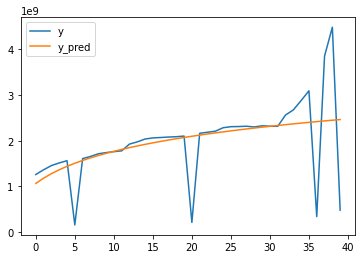

In [47]:
df[['y', 'y_pred']].plot()